# Introduction to Keras: A High-Level Neural Network API

Brian Keng<br>
brian.keng@rotman.utoronto.ca

# Keras: A High-Level Neural Network API

Keras (keras.io) is a Python API that runs on top of various lower level frameworks (e.g. Tensorflow, CNTK, Theano).  It's written by a Google AI researcher named François Chollet.

Great library to use for deep learning because it allows you to go from *idea to result with the least possible delay*.  

Benefits:

* User-friendly, well thought out neural network API
* Modular and extensible from simple to complex architectures
* Supports most common uses of deep learning (e.g. CNN, RNNs) with a simple interface
* Runs seamlessly on CPU and GPU

## Feed Forward Networks via Keras `Sequential` API

### 1. Define your Neural Network

In [1]:
%tensorflow_version 1.x

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(100,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# Alternatively:
# model = Sequential()
# model.add(Dense(32, input_dim=784))
# ...

Using TensorFlow backend.


In [2]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                3232      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 3,562
Trainable params: 3,562
Non-trainable params: 0
_________________________________________________________________


### 2. Compile your Network via `model.compile()`

* Specify loss function
* Specify optimization algorithm
* Specify any metrics you want to track

In [3]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 3. Train Your Network via `Model.fit()`

* Specify data ("X"), labels ("y"), epochs and batch size

In [4]:
import keras
import numpy as np

# Generate dummy data
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=10, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





1000/1000 [==============================] - 1s 881us/step - loss: 2.3523 - acc: 0.0990
Epoch 2/10
1000/1000 [==============================] - 0s 42us/step - loss: 2.3230 - acc: 0.1200
Epoch 3/10
1000/1000 [==============================] - 0s 41us/step - loss: 2.3072 - acc: 0.1190
Epoch 4/10
1000/1000 [==============================] - 0s 38us/step - loss: 2.2945 - acc: 0.1270
Epoch 5/10
1000/1000 [==============================] - 0s 38us/step - loss: 2.2878 - acc: 0.1300
Epoch 6/10
1000/1000 [==============================] - 0s 52us/step - loss: 2.2771 - acc: 0.1400
Epoch 7/10
1000/1000 [==============================] - 0s 39us/step - loss: 2.2680 - acc: 0.1550
Epoch 8/10
1000/1000 [==============================] - 0s 43us/step - loss: 2.2576 - acc: 0.1750
Epoch 9/10
1000/1000 [==============================] - 0s 40us/step - loss: 2.2483 - acc: 0.1600
Epoch 10/10
100

### 4. Predict on unlabelled data

In [5]:
# Generate dummy data
predict_data = np.random.random((10, 100))

prediction = model.predict(predict_data)

# Find highest probability labels
labels = np.argmax(prediction, axis=1)
list(zip(labels[:3], prediction[:3]))

[(5, array([0.05975145, 0.12750433, 0.11408557, 0.06037443, 0.0900787 ,
         0.16257869, 0.08773561, 0.10710888, 0.07967952, 0.11110268],
        dtype=float32)),
 (3, array([0.04818821, 0.08609384, 0.08895582, 0.13524193, 0.06870043,
         0.12951325, 0.11746338, 0.13005921, 0.11270625, 0.0830776 ],
        dtype=float32)),
 (9, array([0.10088767, 0.11836628, 0.09344955, 0.07560898, 0.10078921,
         0.11977554, 0.10519368, 0.08856922, 0.07004032, 0.12731954],
        dtype=float32))]

## Datasets

We'll be using two well known datasets to illustrate how to use Keras:

* **MNIST Handwritten Digits**: database of handwritten digits containing 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
* **Boston Housing Price**: Dataset containing 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k\$).

Let's take a look at them.

### MNIST Handwritten Digits Dataset

11493376/11490434 [==============================] - 2s 0us/step


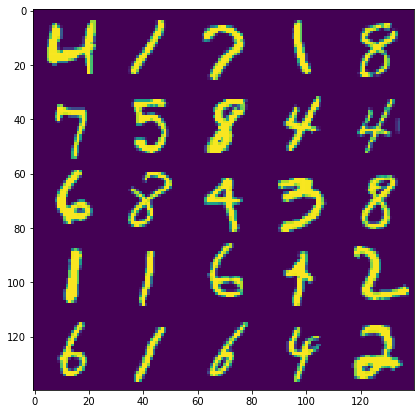

In [6]:
%matplotlib inline
from keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

def display_grid(dataset, digit_size=28, depth=1, grid_size=5, seed=0, figsize=(5, 5)):
    # Display some digits to figure out what's going on
    if depth == 1:
        figure = np.zeros((digit_size * grid_size, digit_size * grid_size))
    else:
        figure = np.zeros((digit_size * grid_size, digit_size * grid_size, 3))

    if seed is not None:
        np.random.seed(seed)
    for i in range(grid_size):
        for j in range(grid_size):
            digit = dataset[np.random.randint(len(dataset))]
            d_x, d_y = i * digit_size, j * digit_size
            if depth == 1:
                figure[d_x:d_x + digit_size, d_y:d_y + digit_size] = digit.astype(int)
            else:
                figure[d_x:d_x + digit_size, d_y:d_y + digit_size, :] = digit.astype(int)

    plt.figure(figsize=figsize)
    plt.imshow(figure)
    plt.show()

# Train: 60000 x 28 x 28
# Test: 10000 x 28 x 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
display_grid(x_train, figsize=(7, 7))

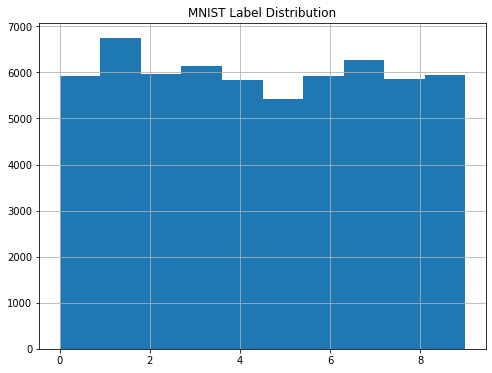

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(y_train).hist(bins=10, figsize=(8, 6))
plt.title('MNIST Label Distribution');

### Boston House Price Dataset

In [8]:
%matplotlib inline
from keras.datasets import boston_housing
import pandas as pd

# Train: 404 x 13
# Test: 102 x 13
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

pd.DataFrame(x_train).describe()

57344/57026 [==============================] - 0s 3us/step


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


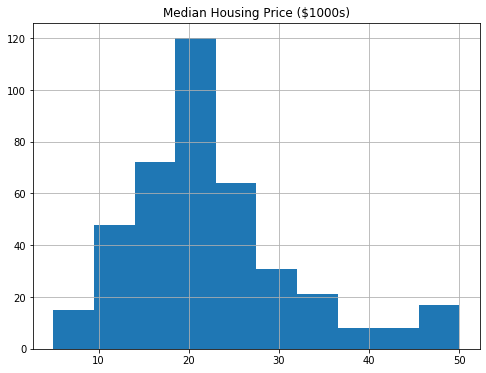

In [9]:
# Graph outcome variable
pd.DataFrame(y_train).hist(bins=10, figsize=(8, 6))
plt.title('Median Housing Price ($1000s)');

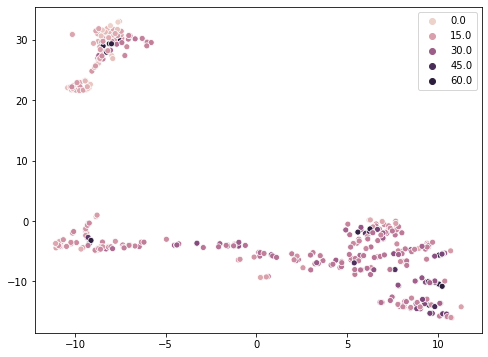

In [10]:
from sklearn import manifold, datasets
import seaborn as sns

# Reduce dimension of data via t-TSNE algorithm
tsne = manifold.TSNE(n_components=2, init='random', random_state=0, perplexity=50)
reduced_data = tsne.fit_transform(x_train)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(reduced_data[:, 0], reduced_data[:, 1], hue=y_train);

### Hands-on Practice

When learning a new API, hands-on practice is more important than lectures.  For the next section,
let's work though each one of the notebooks that I've prepared to introduce you to Keras.

## References

* Keras Documentation: https://keras.io/
* Francois Chollet's Twitter: https://twitter.com/fchollet